In [1]:
import skimage
import numpy as np
np.random.seed(42)
import pandas as pd

from pathlib import Path
from scipy import ndimage
from skimage import transform
from read_datasets import read_data 
from matplotlib import pyplot as plt
from read_datasets import DATA_PATH, ICMC_PATH, ORIGNAL_PATH
pd.set_option('display.max_columns', 50)

In [2]:
icmc_x, icmc_y = read_data(DATA_PATH + "PessoasICMC/", size=(20, 1, 300, 200))
print(icmc_x.shape, icmc_y.shape, sep='\n')

(20, 300, 200)
(20,)


In [3]:
def data_augmentation(img):      
    """ Applys data augmentation to the image
    
    Parameters
    ----------
    img :   numpy.array 
            Contains the original image    
    """
    imgs = []
    
    # Append the original image
    imgs.append(img)
    
    # Flip an array horizontally (axis=1)         
    imgs.append(np.fliplr(img))           

    # We create 8 images, rotating between -base_angle and +base_angle, 
    #    adding noise to every 2 images
    base_angle = 45
    rotation_amount = 8
    angles = np.arange(-base_angle, base_angle, (2*base_angle)/rotation_amount)
    noises = [True, False] * (rotation_amount//2)
    for angle, noise in zip(angles, noises):
        new_img = transform.rotate(img, angle=angle, mode="edge", 
                                   cval=1, preserve_range=True)     
        if noise:
            imgs.append(ndimage.gaussian_filter(new_img, sigma=np.random.rand()+1.5))
        else:
            imgs.append(new_img)
            
    return np.array(imgs)

In [4]:
new_icmc_x = []

[new_icmc_x.append(data_augmentation(icmc_x[class_num])) for class_num in range(icmc_y.size)]

new_icmc_x = np.array(new_icmc_x)

new_icmc_x.shape

(20, 10, 300, 200)

In [5]:
# Source: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)

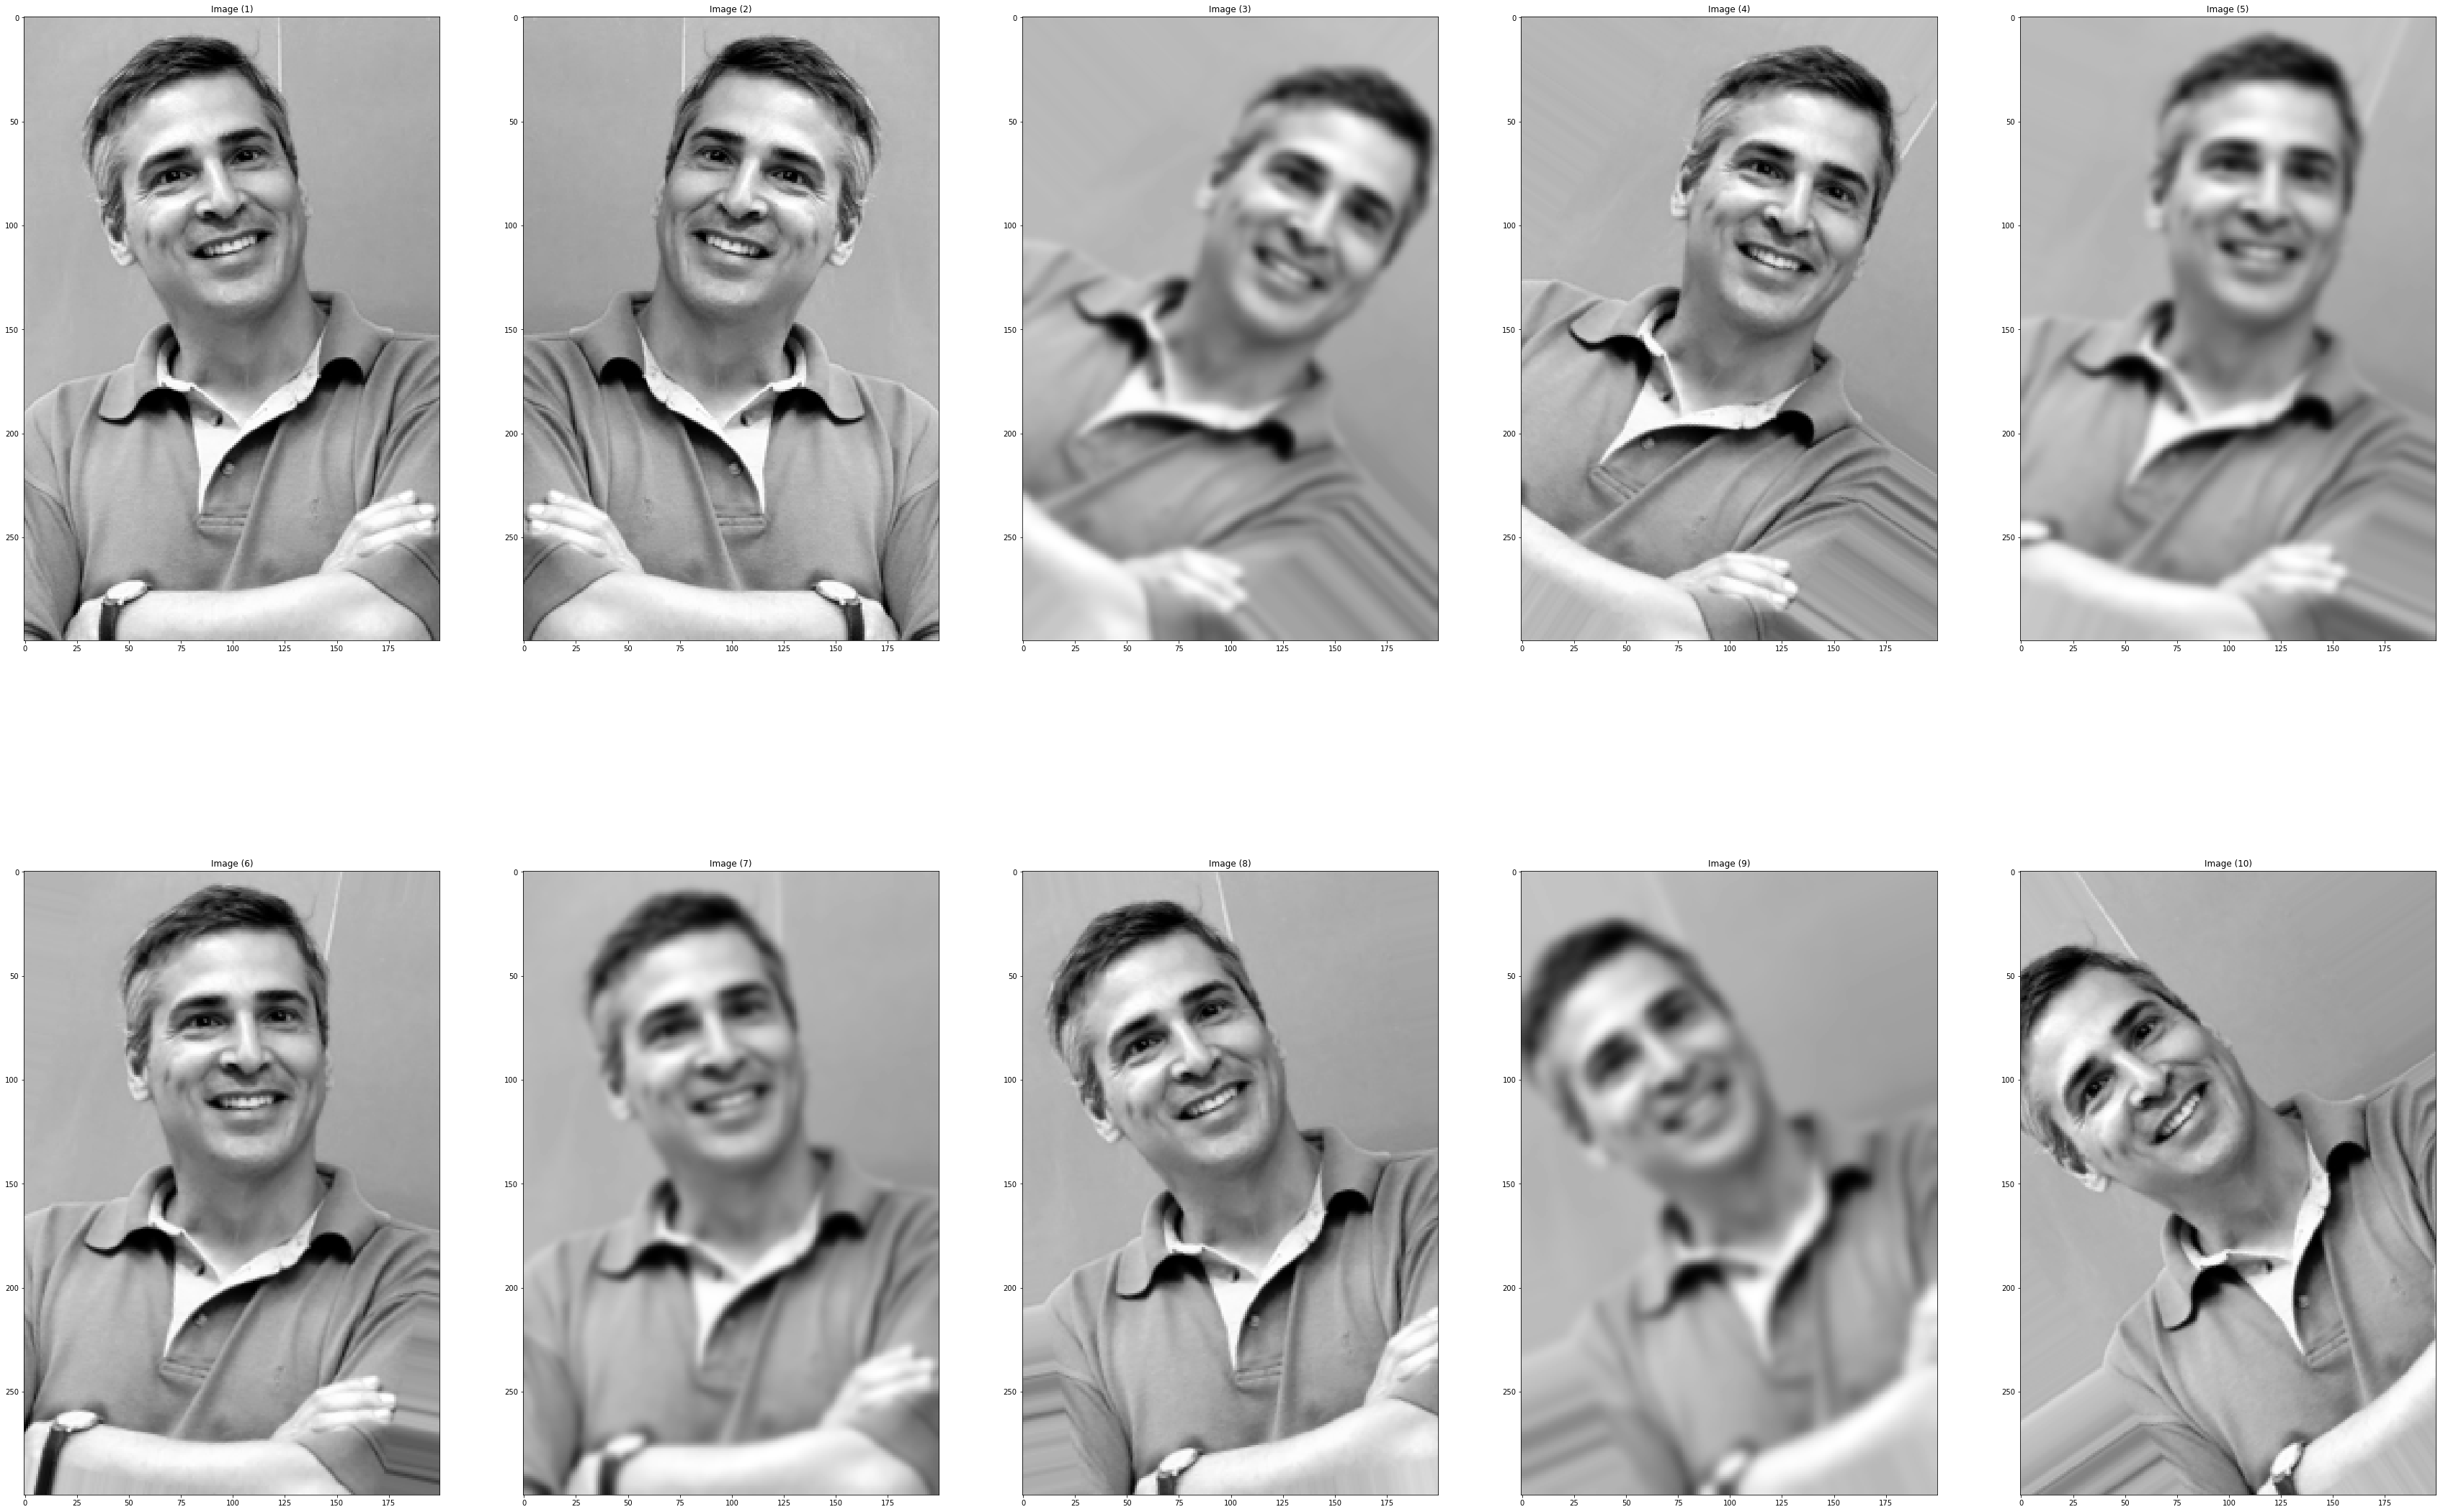

In [6]:
# Preview data augmentation
show_images(new_icmc_x[1], cols = 2, titles = None)
plt.savefig("pics/data_augmentation.png")

In [7]:
EXT="png"
SUB_FOLDER=DATA_PATH+ICMC_PATH+"p"

def save_data(imgs):
    folders = sorted(np.arange(imgs.shape[0]).tolist()*imgs.shape[1])    
    idx_imgs = (np.arange(imgs.shape[1]).tolist()*imgs.shape[0])   
    
    #[skimage.io.imsave(fname=f"{SUB_FOLDER}{i+1}/{j+1}.{EXT}", arr=imgs[i][j]) for i, j in zip(folders, idx_imgs)]
    skimage.io.use_plugin('pil')
    [skimage.io.imsave(fname=f"{SUB_FOLDER}{i+1}/{j+1}.{EXT}", 
                       arr=imgs[i][j].astype(np.uint16)) 
    for i, j in zip(folders, idx_imgs)]

In [8]:
# Saving images to disc
save_data(new_icmc_x)